In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Step 1: Load the Credit Risk Dataset

In [2]:
data = pd.read_csv('/content/credit_risk_dataset.csv')
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


# Step 2: Explore the Dataset

In [3]:
print("Dataset Shape:", data.shape)
print(data.info())
print(data.describe())

Dataset Shape: (32581, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None

# Step 3: Handle Missing Values
Fills missing values in the dataset by using the last valid value from the row above (ffill method). The changes are applied directly to the original dataset with inplace=True.
# Step 4: Encode Categorical Variables (One-Hot Encoding)
Encodes categorical variables in the dataset using one-hot encoding. It converts each categorical column into multiple binary columns and drops the first category to avoid redundancy.

In [4]:
# Handle Missing Values
data.fillna(method='ffill', inplace=True)

# Step 4: Encode Categorical Variables (One-Hot Encoding)
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  int64  
 1   person_income                32581 non-null  int64  
 2   person_emp_length            32581 non-null  float64
 3   loan_amnt                    32581 non-null  int64  
 4   loan_int_rate                32581 non-null  float64
 5   loan_status                  32581 non-null  int64  
 6   loan_percent_income          32581 non-null  float64
 7   cb_person_cred_hist_length   32581 non-null  int64  
 8   person_home_ownership_OTHER  32581 non-null  bool   
 9   person_home_ownership_OWN    32581 non-null  bool   
 10  person_home_ownership_RENT   32581 non-null  bool   
 11  loan_intent_EDUCATION        32581 non-null  bool   
 12  loan_intent_HOMEIMPROVEMENT  32581 non-null  bool   
 13  loan_intent_MEDI

<ipython-input-4-2c44b75001d5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Step 5: Define Discriptive Features (X) and Target (y) then Split into Train-test sets. Later Standardize the data
This code first defines the features (X) by removing the target column ('loan_status') and sets y as the target variable. It then splits the data into training and testing sets (70% training, 30% testing) while ensuring the distribution of the target variable is similar in both sets, and standardizes the features using StandardScaler for better model performance.

In [5]:
# Step 5: Define Features (X) and Target (y)
X = data.drop(columns=['loan_status'])
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Standardize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Model Training, Evaluation, and ROC Curve Plotting.
## 1) Logistic Regression
This code trains a logistic regression model using the training data with class balancing for imbalanced datasets. It then makes predictions on the test data, evaluates the model's performance using accuracy, confusion matrix, classification report, and ROC-AUC score, and finally plots the ROC curve to visualize the model's true positive rate versus false positive rate.

Accuracy: 0.8140153452685422

Confusion Matrix:
 [[6284 1358]
 [ 460 1673]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87      7642
           1       0.55      0.78      0.65      2133

    accuracy                           0.81      9775
   macro avg       0.74      0.80      0.76      9775
weighted avg       0.85      0.81      0.82      9775


ROC-AUC Score: 0.8738947654368431


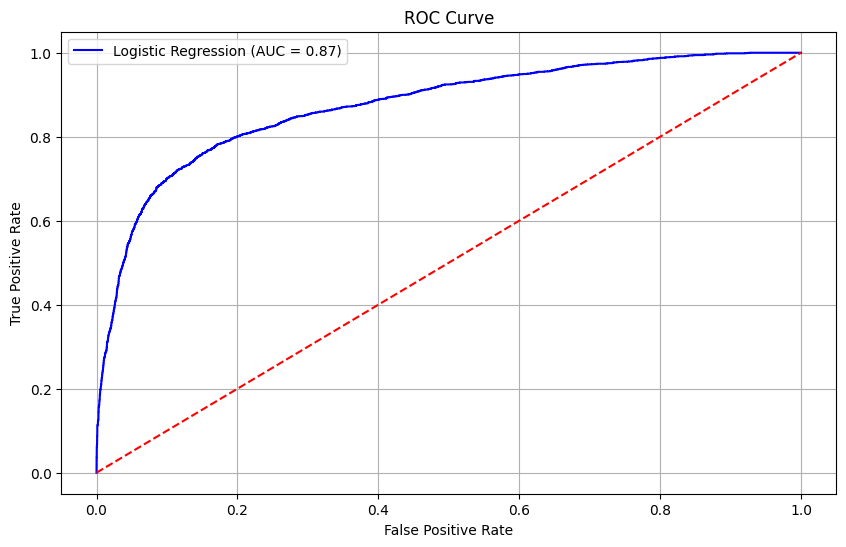

In [6]:
# Train Logistic Regression Model
log_reg = LogisticRegression(random_state=42, class_weight='balanced')  # class_weight handles imbalanced data
log_reg.fit(X_train, y_train)

# Make Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## 2) Decision Tree Classifier
This code trains a decision tree classifier with class balancing for imbalanced data and limits the tree's depth to 3 for simplicity. It then makes predictions, evaluates the model using accuracy, confusion matrix, classification report, and ROC-AUC score, and visualizes the ROC curve. Additionally, it provides an optional visualization of the decision tree itself to interpret the model’s decisions.

Training Accuracy: 0.8756029115145137

Training Confusion Matrix:
 [[16317  1514]
 [ 1323  3652]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     17831
           1       0.71      0.73      0.72      4975

    accuracy                           0.88     22806
   macro avg       0.82      0.82      0.82     22806
weighted avg       0.88      0.88      0.88     22806


Training ROC-AUC Score: 0.8776779190664781

Test Accuracy: 0.8736572890025576

Test Confusion Matrix:
 [[6961  681]
 [ 554 1579]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      7642
           1       0.70      0.74      0.72      2133

    accuracy                           0.87      9775
   macro avg       0.81      0.83      0.82      9775
weighted avg       0.88      0.87      0.87      9775


Test ROC-AUC Score: 0.8770745981107442


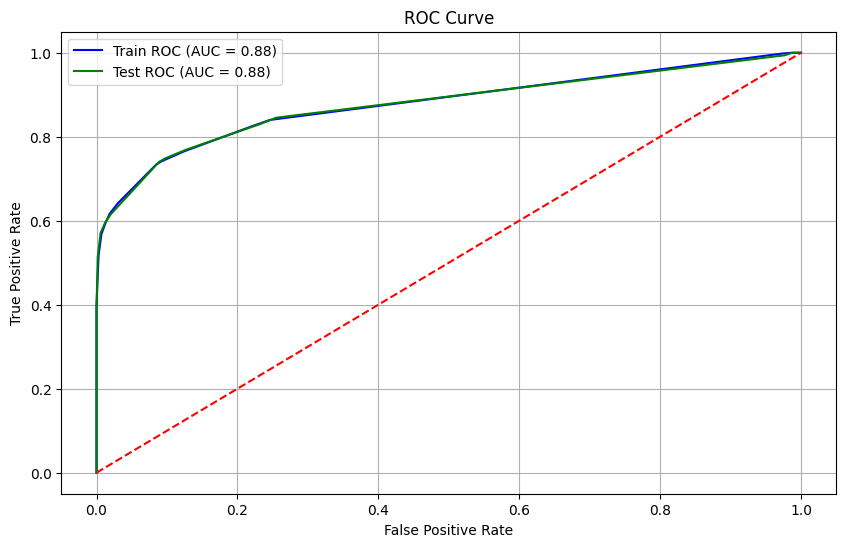

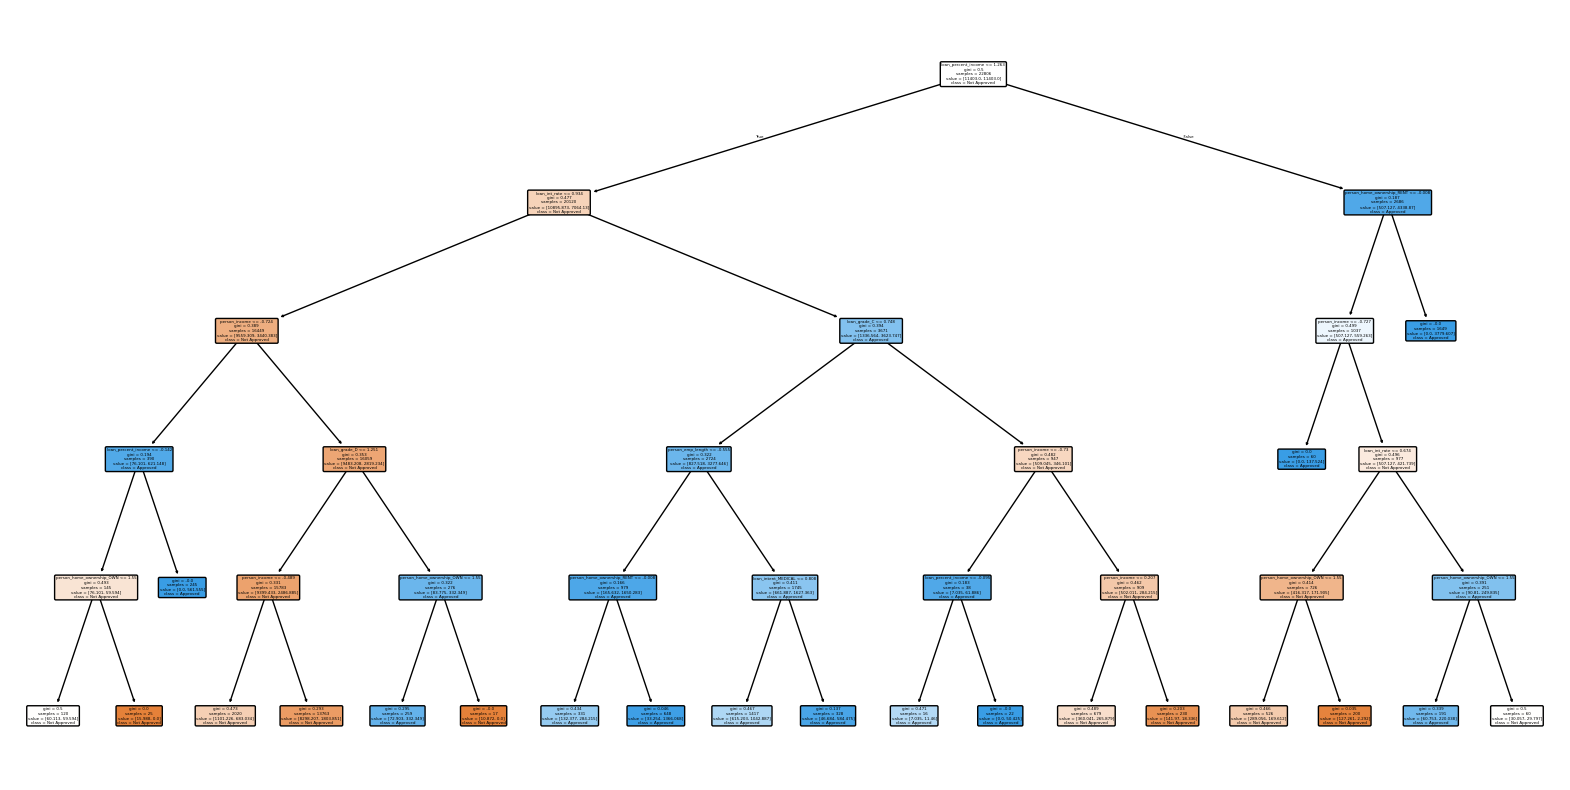

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)  # Adjust max_depth if needed
tree_clf.fit(X_train, y_train)

# Make Predictions
y_train_pred = tree_clf.predict(X_train)
y_train_prob = tree_clf.predict_proba(X_train)[:, 1]  # Probabilities for ROC Curve
y_test_pred = tree_clf.predict(X_test)
y_test_prob = tree_clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

# Evaluate the Model on Training Data
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTraining ROC-AUC Score:", roc_auc_score(y_train, y_train_prob))

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Visualize the Decision Tree (Optional)
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
plt.show()

### Hyperparameter Tuning and Evaluation of Decision Tree Classifier
This code performs hyperparameter tuning on a decision tree classifier using GridSearchCV with a parameter grid for different values of max_depth, min_samples_split, min_samples_leaf, and class_weight. It then trains the model using cross-validation, selects the best hyperparameters, makes predictions on both the training and test sets, and evaluates the model using accuracy, confusion matrix, classification report, and ROC-AUC score. Finally, it plots the ROC curves for both the training and test sets to compare model performance

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Test Accuracy: 0.9253196930946291

Test Confusion Matrix:
 [[7534  108]
 [ 622 1511]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      7642
           1       0.93      0.71      0.81      2133

    accuracy                           0.93      9775
   macro avg       0.93      0.85      0.88      9775
weighted avg       0.93      0.93      0.92      9775


Test ROC-AUC Score: 0.9029869906148236


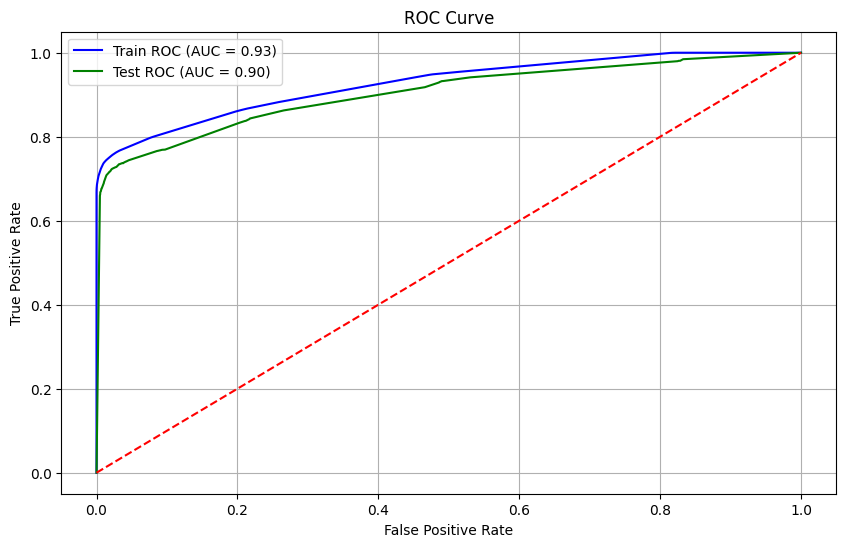

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Experimenting with different depths
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],    # Minimum samples required to be at a leaf node
    'class_weight': ['balanced', None]  # Experiment with class balancing
}

# Create the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_tree_clf = grid_search.best_estimator_
y_train_pred = best_tree_clf.predict(X_train)
y_train_prob = best_tree_clf.predict_proba(X_train)[:, 1]  # Probabilities for ROC Curve
y_test_pred = best_tree_clf.predict(X_test)
y_test_prob = best_tree_clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

<ipython-input-9-b7e481d2ebf5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


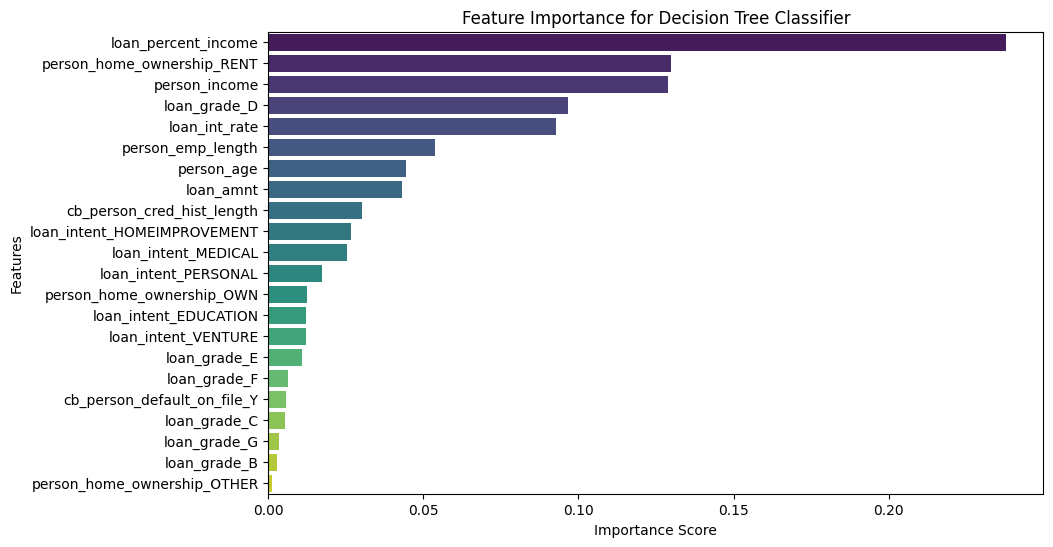

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn.tree import DecisionTreeClassifier

# Assuming X_train and y_train are your training data
best_model = DecisionTreeClassifier()
best_model.fit(X_train, y_train)


# Step 1: Plot Feature Importance
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title('Feature Importance for Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## 3) Random Forest


Test Accuracy: 0.9310485933503836

Test Confusion Matrix:
 [[7561   81]
 [ 593 1540]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7642
           1       0.95      0.72      0.82      2133

    accuracy                           0.93      9775
   macro avg       0.94      0.86      0.89      9775
weighted avg       0.93      0.93      0.93      9775


Test ROC-AUC Score: 0.9310664790392081


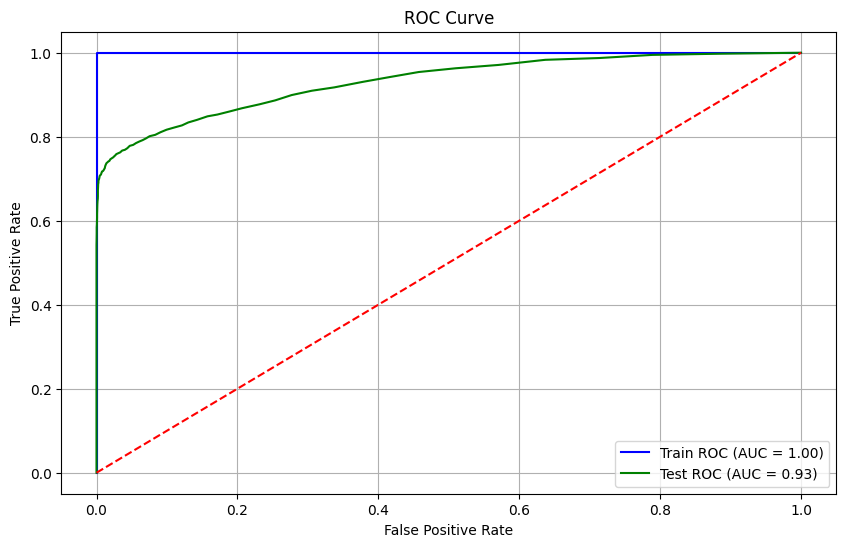

In [10]:
# Importing Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_clf.fit(X_train, y_train)

# Make Predictions
y_train_pred = rf_clf.predict(X_train)
y_train_prob = rf_clf.predict_proba(X_train)[:, 1]  # Probabilities for ROC Curve
y_test_pred = rf_clf.predict(X_test)
y_test_prob = rf_clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## 4) K-Nearest Neighbors (KNN)


Test Accuracy: 0.8996470768758631

Test Confusion Matrix:
 [[4932  140]
 [ 514  931]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5072
           1       0.87      0.64      0.74      1445

    accuracy                           0.90      6517
   macro avg       0.89      0.81      0.84      6517
weighted avg       0.90      0.90      0.89      6517


Test ROC-AUC Score: 0.8676194972329254


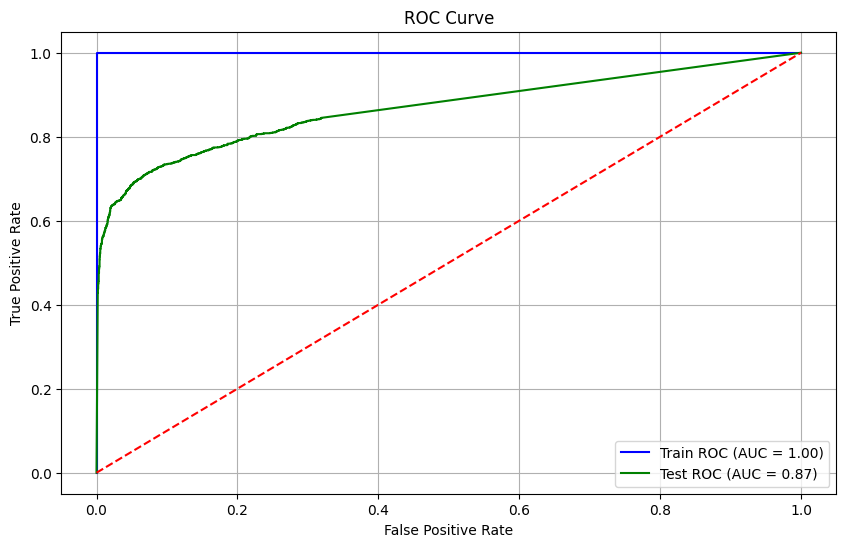

In [18]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scale the features (KNN requires feature scaling for optimal performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=2)
knn_clf.fit(X_train_scaled, y_train)

# Make Predictions
y_train_pred = knn_clf.predict(X_train_scaled)
y_train_prob = knn_clf.predict_proba(X_train_scaled)[:, 1]  # Probabilities for ROC Curve
y_test_pred = knn_clf.predict(X_test_scaled)
y_test_prob = knn_clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC Curve

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


## 5) Naive Bayes


Test Accuracy: 0.833052017799601

Test Confusion Matrix:
 [[4779  293]
 [ 795  650]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      5072
           1       0.69      0.45      0.54      1445

    accuracy                           0.83      6517
   macro avg       0.77      0.70      0.72      6517
weighted avg       0.82      0.83      0.82      6517


Test ROC-AUC Score: 0.842899479331536


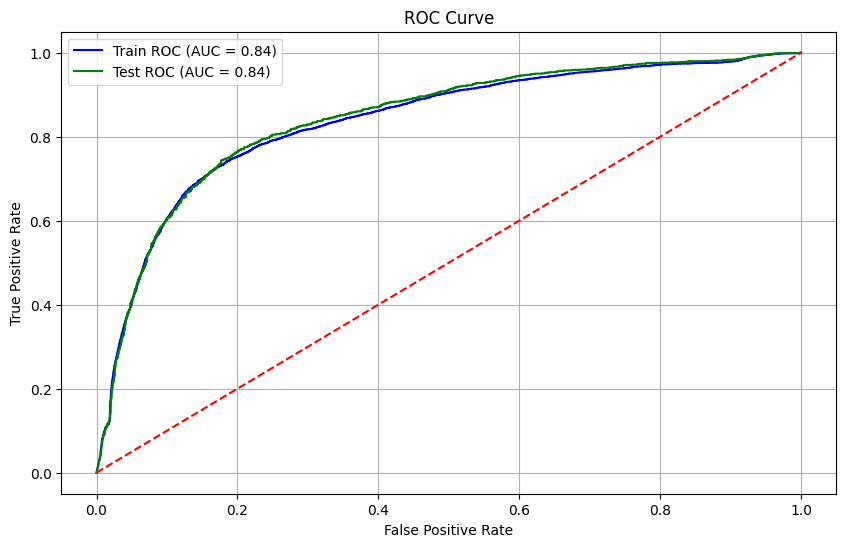

In [19]:
# Import required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scale the features (Naive Bayes may benefit from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)

# Make Predictions
y_train_pred = nb_clf.predict(X_train_scaled)
y_train_prob = nb_clf.predict_proba(X_train_scaled)[:, 1]  # Probabilities for ROC Curve
y_test_pred = nb_clf.predict(X_test_scaled)
y_test_prob = nb_clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC Curve

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


## 6) Support Vector Classifier (SVC)


Test Accuracy: 0.7376093294460642

Test Confusion Matrix:
 [[3934 1138]
 [ 572  873]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      5072
           1       0.43      0.60      0.51      1445

    accuracy                           0.74      6517
   macro avg       0.65      0.69      0.66      6517
weighted avg       0.78      0.74      0.75      6517


Test ROC-AUC Score: 0.7515012880268085


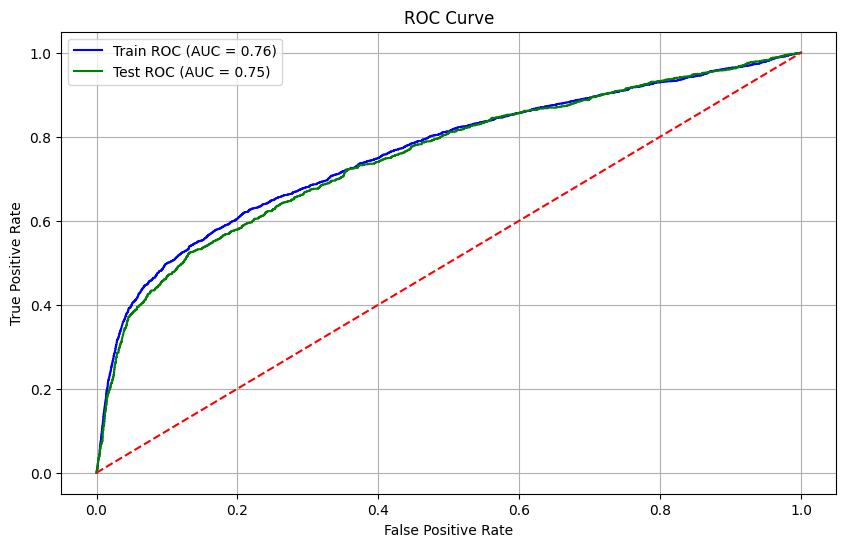

In [20]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train SVM Classifier
svm_clf = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_clf.fit(X_train, y_train)

# Make Predictions
y_train_pred = svm_clf.predict(X_train)
y_train_prob = svm_clf.predict_proba(X_train)[:, 1]  # Probabilities for ROC Curve
y_test_pred = svm_clf.predict(X_test)
y_test_prob = svm_clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## 7) Gradient Boosting Algorithms (e.g., Gradient Boosting, XGBoost, LightGBM, or CatBoost)


Test Accuracy: 0.9203621298143317

Test Confusion Matrix:
 [[4997   75]
 [ 444 1001]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5072
           1       0.93      0.69      0.79      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.84      0.87      6517
weighted avg       0.92      0.92      0.92      6517


Test ROC-AUC Score: 0.9277737602741969


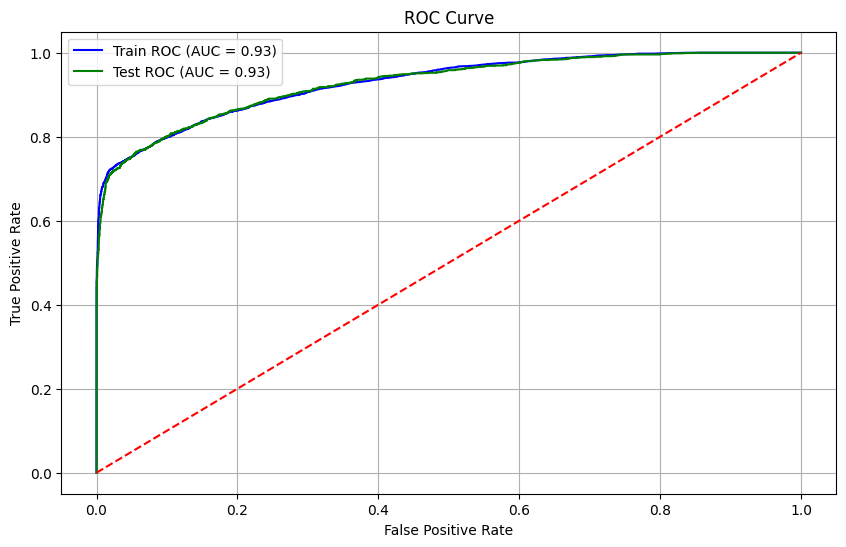

In [11]:
#Gradient Boosting
# Importing Libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model
gb_clf.fit(X_train, y_train)

# Make Predictions
y_train_pred = gb_clf.predict(X_train)
y_train_prob = gb_clf.predict_proba(X_train)[:, 1]
y_test_pred = gb_clf.predict(X_test)
y_test_prob = gb_clf.predict_proba(X_test)[:, 1]

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:07:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Test Accuracy: 0.9337118305969004

Test Confusion Matrix:
 [[5016   56]
 [ 376 1069]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.74      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.90      6517
weighted avg       0.93      0.93      0.93      6517


Test ROC-AUC Score: 0.9481116217130756


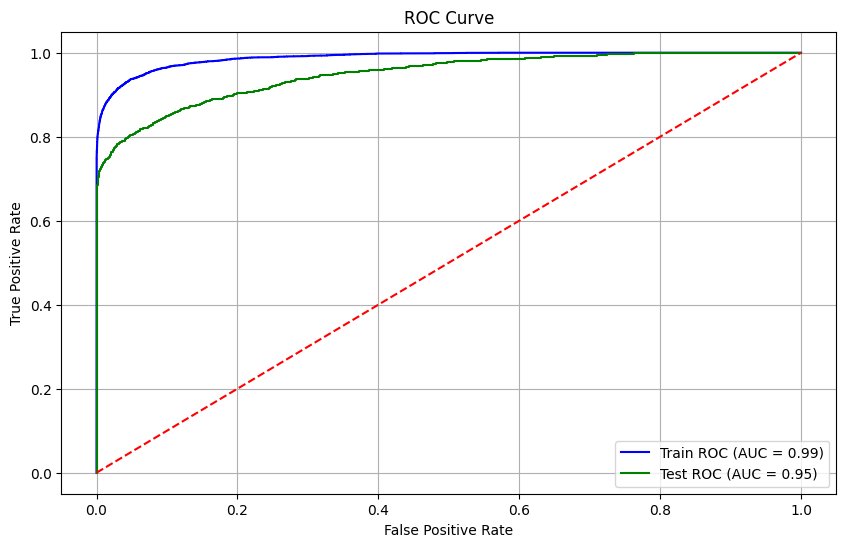

In [12]:
#XGBoosting
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

xgb_clf.fit(X_train, y_train)

# Make Predictions
y_train_pred = xgb_clf.predict(X_train)
y_train_prob = xgb_clf.predict_proba(X_train)[:, 1]
y_test_pred = xgb_clf.predict(X_test)
y_test_prob = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 5663, number of negative: 20401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 26064, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217273 -> initscore=-1.281630
[LightGBM] [Info] Start training from score -1.281630

Test Accuracy: 0.9332514960871566

Test Confusion Matrix:
 [[5018   54]
 [ 381 1064]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.74      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517


Test ROC-AUC Score: 0.9479436597426129


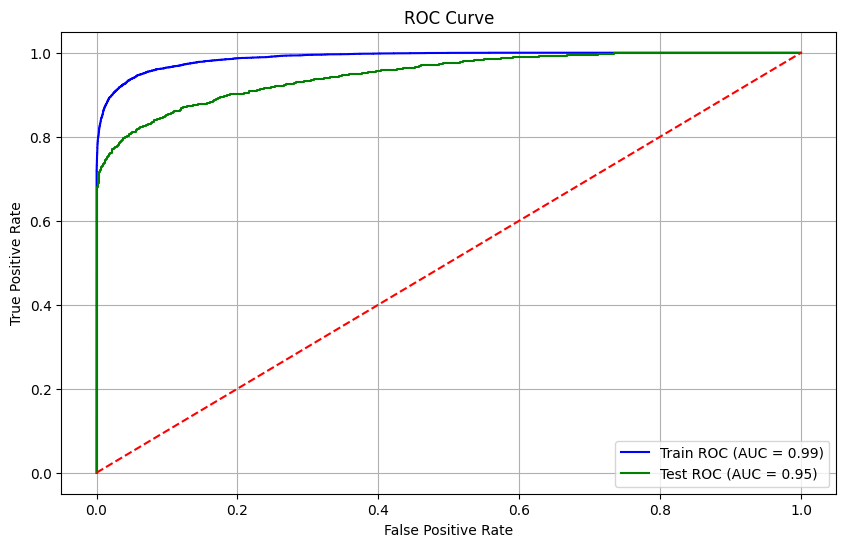

In [13]:
#LightBGM
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assume X and y are the features and target variable
# X = Features (credit data such as age, income, credit score, etc.)
# y = Target (1 for default, 0 for non-default)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set Initial Hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'random_state': 42
}

# Train the LightGBM Model
lgb_model = lgb.train(params, train_data, num_boost_round=200, valid_sets=[train_data, test_data],
                     )

# Make Predictions
y_train_prob = lgb_model.predict(X_train, num_iteration=lgb_model.best_iteration)
y_test_prob = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Convert probabilities to binary predictions
y_train_pred = (y_train_prob >= 0.5).astype(int)
y_test_pred = (y_test_prob >= 0.5).astype(int)

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [16]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


0:	test: 0.8521932	best: 0.8521932 (0)	total: 67.5ms	remaining: 33.7s
100:	test: 0.9329635	best: 0.9329635 (100)	total: 5.62s	remaining: 22.2s
200:	test: 0.9416948	best: 0.9416948 (200)	total: 8.2s	remaining: 12.2s
300:	test: 0.9439543	best: 0.9439594 (295)	total: 11.2s	remaining: 7.39s
400:	test: 0.9457990	best: 0.9458719 (396)	total: 13.5s	remaining: 3.32s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9459480369
bestIteration = 420

Shrink model to first 421 iterations.

Test Accuracy: 0.9353997237992941

Test Confusion Matrix:
 [[5035   37]
 [ 384 1061]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.97      0.73      0.83      1445

    accuracy                           0.94      6517
   macro avg       0.95      0.86      0.90      6517
weighted avg       0.94      0.94      0.93      6517


Test ROC-AUC Score: 0.9459480368506652


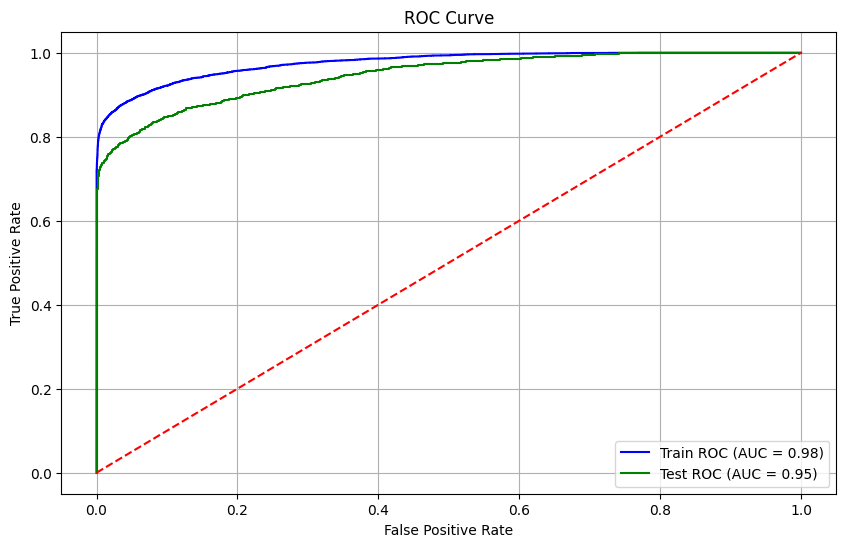

In [17]:
#CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=500,        # Number of boosting iterations
    learning_rate=0.1,     # Learning rate
    depth=6,               # Depth of the tree
    loss_function='Logloss',  # Loss function
    eval_metric='AUC',     # Evaluation metric
    random_seed=42,
    verbose=100            # Output logs every 100 iterations
)

# Train the CatBoost model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, use_best_model=True)

# Make Predictions
y_train_prob = cat_model.predict_proba(X_train)[:, 1]
y_test_prob = cat_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions
y_train_pred = (y_train_prob >= 0.5).astype(int)
y_test_pred = (y_test_prob >= 0.5).astype(int)

# Evaluate the Model on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

# Plot ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC (AUC = {:.2f})'.format(roc_auc_score(y_train, y_train_prob)))
plt.plot(fpr_test, tpr_test, color='green', label='Test ROC (AUC = {:.2f})'.format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()